In [1]:
%matplotlib notebook
# starter code
import random
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import networkx as nx
from graph_tool.all import load_graph, shortest_distance, GraphView
from networkx.drawing.nx_agraph import graphviz_layout

from cascade import gen_nontrivial_cascade
from utils import get_rank_index

seed = 123456
random.seed(seed)
np.random.seed(seed)

gtype = 'grid'
g = load_graph('data/{}/2-6/graph.gt'.format(gtype))
gnx = nx.read_graphml('data/{}/2-6/graph.graphml'.format(gtype))
gnx = nx.relabel_nodes(gnx, {i: int(i) for i in gnx.nodes_iter()})
N1, N2 = 100, 100
p, q = 0.5, 1.0

pos = graphviz_layout(gnx, root=0)

infection_times, source, obs_nodes, true_tree = gen_nontrivial_cascade(g, p, q, model='sp', return_tree=True, source_includable=True)

<IPython.core.display.Javascript object>


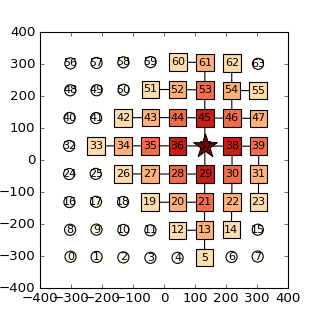

In [2]:
from plot_utils import plot_snapshot
from utils import extract_edges

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True, ax=ax,
             edges=extract_edges(true_tree))


In [3]:
infection_times, source, obs_nodes = gen_nontrivial_cascade(g, p, q, model='sp', return_tree=False, source_includable=True)

<IPython.core.display.Javascript object>


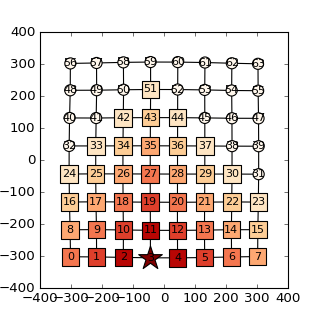

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True, ax=ax,
             edges=None)
